# Центральная предельная теорема своими руками

In [110]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Определение функции, отрисовка графиков

In [114]:
# Выбираем гамма распределение
a=2
b = 5 
rv=sts.gamma(a,b)
# Генерируем выборку объёма 1000
N=1000
sample=rv.rvs(N)

In [121]:
# Вычисляем плотность распределения
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
pdf=rv.pdf(x)

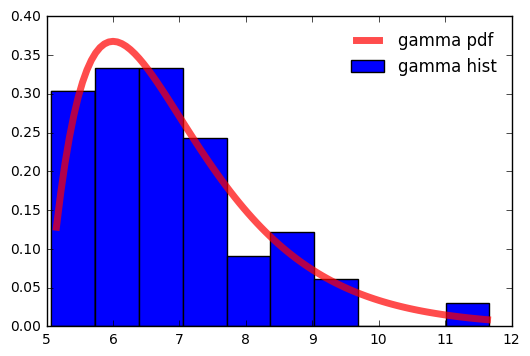

In [122]:
# Строим гистограмму выборки
plt.hist(sample,normed=True,label='gamma hist')
plt.plot(x, pdf,'r-', lw=5, alpha=0.7, label='gamma pdf')
plt.legend(loc='best', frameon=False)
plt.show()


## Оценка распределения выборочного среднего при разных объёмах выборок

In [107]:
# Посчитаем параметры нормального распределения

# Сначала вычислим теоретические значения мат.ожидания и дисперсии для Гамма распределения
# Для гамма распределения G(a,b) - матожидание = a*b, дисперсия = a*b*b

# Дисперсия 
variance = a*b*b
# Математическое ожидание
expect= a*b 

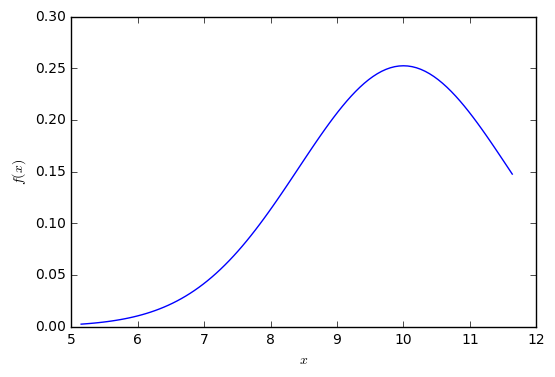

In [117]:
# Дисперсия для нормального распредление
norm_variance=math.sqrt(variance/20)
norm_rv = sts.norm(expect,norm_variance)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()


In [118]:
# определим фуникцию для выборочного среднего
def sample_mean(s):
    res=0
    for x in s:
        res=res+x
    return res/len(s)


n= 5


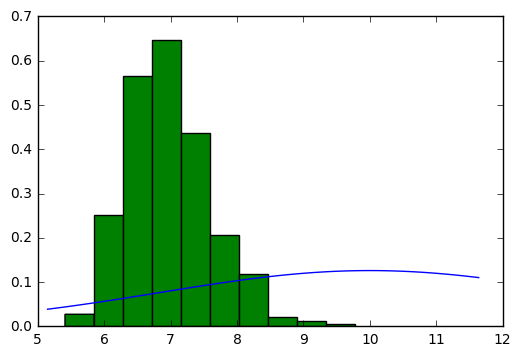

n= 10


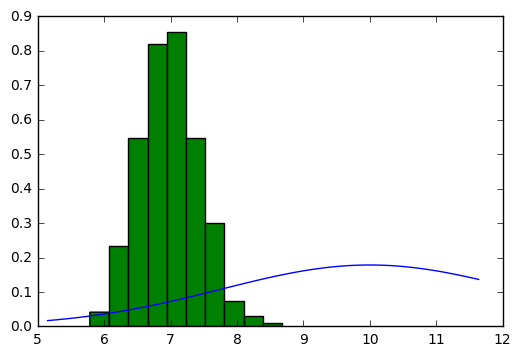

n= 50


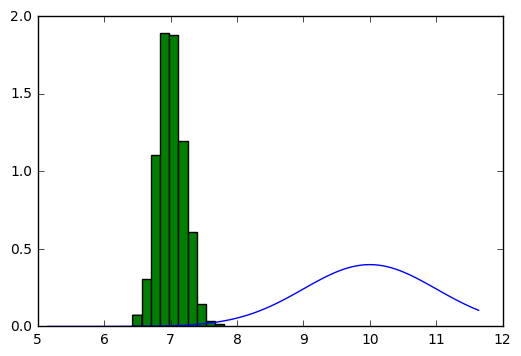

In [129]:
# Сформируем выборки
qty=1000
# Будем для 3х разных значений n
for n in (5,10,50):
    means=list()
    # Фомировать 1000 выборок
    for i in range(qty):
        # Формируем выборку объема n
        sample=rv.rvs(n)
        # Считаем выборочное среднее для выборки
        means.append(sample_mean(sample))
    # Дисперсия для апроксимирующего нормального распредление
    norm_variance=math.sqrt(variance/n)
    # Вычислим плотность на том же
    norm_rv = sts.norm(expect,norm_variance)
    norm_pdf = norm_rv.pdf(x)
   
    #Строим гистограму распределений значений выборочного срденего для очередного n и функцию лотности для нормального распредления
    print ("n=",n)
    plt.plot(x, norm_pdf)    
    plt.hist(means,normed=True,label='gamma hist')
    plt.show()

In [97]:
?sts.gamma